- https://github.com/yang-zhang/ds-math/blob/master/log_loss.ipynb
- https://github.com/yang-zhang/yang-zhang.github.io/blob/master/ds_math/entropy_mutual_information_kl_divergence.ipynb
- https://en.wikipedia.org/wiki/Cross_entropy#Cross-entropy_error_function_and_logistic_regression

In [46]:
%matplotlib inline
import matplotlib.pyplot as plt


In [2]:
import numpy as np
import sklearn.metrics 

In [104]:
def log_loss_binary_scalar(y_true, y_pred, eps=1e-15):
    if y_pred < eps:
        y_pred = eps
    elif y_pred > 1 - eps:
        y_pred = 1 - eps
    if y_true == 1:
        return -np.log(y_pred)
    else:
        return -np.log(1 - y_pred)

In [105]:
log_loss_binary_scalar(0, 0.1), sklearn.metrics.log_loss([0], [0.1], labels=(0, 1), eps=1e-15)

(0.10536051565782628, 0.10536051565782628)

In [40]:
log_loss_binary_scalar(1, 0.9), sklearn.metrics.log_loss([1], [0.9], labels=(0, 1), eps=1e-15)

(0.10536051565782628, 0.10536051565782628)

#### binary

In [21]:
labels = [0, 1, 1]
preds = [0.2, 0.9, 0.9]

print("Sklearn:", sklearn.metrics.log_loss(labels, preds, eps=1e-15))





def log_loss(y_true, y_pred, eps=1e-15):
    total_loss = 0.
    n = 0.
    for label, pred in zip(labels, preds):
        if pred < eps:
            pred = eps
        elif pred > 1 - eps:
            pred = 1 - eps
        if label == 1:
            total_loss += -np.log(pred)
        else:
            total_loss += -np.log(1 - pred)
        n += 1
    return total_loss / n

print("Ours:", log_loss(labels, preds))

Sklearn: 0.14462152754328741
Ours: 0.14462152754328741


#### labels

In [22]:
labels = [0, 1, 2, 0]
preds = [[0.2, 0.8, 0.0], 
         [0.9, 0.05, 0.05], 
         [0.5, 0.1, 0.4],
         [0.1, 0.1, 0.8]]

print("Sklearn:", sklearn.metrics.log_loss(labels, preds, eps=1e-15))

def log_loss(y_true, y_pred, eps=1e-15):
    total_loss = 0.
    n = 0.
    for label, ps in zip(labels, preds):
        p = ps[label]
        if p < eps:
            p = eps
        elif p > 1 - eps:
            p = 1 - eps
        total_loss += -np.log(p)
        n += 1
    return total_loss / n

print("Ours:", log_loss(labels, preds))

Sklearn: 1.9560115027140732
Ours: 1.9560115027140728


In [106]:
def cross_entropy(p, q):
    ce = 0.
    for pi, qi in zip(p, q):
        ce += -(pi * np.log(qi))
    return ce

def entropy(p):
    p = np.array(p)
    return sum(-p * np.log(p))

def kl_divergence(p, q):
    p, q = np.array(p), np.array(q)
    sum_ = 0
    for i, pi in enumerate(p):
        if pi != 0:
            sum_ += pi * np.log(pi/q[i])
    return sum_

In [107]:
p = [0.5, 0.5]
q = [0.5, 0.5]
cross_entropy(p, q), entropy(p), kl_divergence(p, q)

(0.6931471805599453, 0.6931471805599453, 0.0)

In [108]:
p = [0.1, 0.9]
q =  [0.1, 0.9]
cross_entropy(p, q), entropy(p), kl_divergence(p, q)

(0.3250829733914482, 0.3250829733914482, 0.0)

In [109]:
p = [1, 0]
q =  [1, 0]
cross_entropy(p, q), entropy(p), kl_divergence(p, q)

/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:4: RuntimeWarning: divide by zero encountered in log
  after removing the cwd from sys.path.
/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:4: RuntimeWarning: invalid value encountered in double_scalars
  after removing the cwd from sys.path.
/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:9: RuntimeWarning: divide by zero encountered in log
  if __name__ == '__main__':
/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:9: RuntimeWarning: invalid value encountered in multiply
  if __name__ == '__main__':


(nan, nan, 0.0)

In [111]:
p = [1, 0]
q = [0.9, 0.1]
cross_entropy(p, q), entropy(p), kl_divergence(p, q)

/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:9: RuntimeWarning: divide by zero encountered in log
  if __name__ == '__main__':
/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:9: RuntimeWarning: invalid value encountered in multiply
  if __name__ == '__main__':


(0.10536051565782628, nan, 0.10536051565782635)

In [112]:
log_loss_binary_scalar(1, 0.9, eps=1e-15)

0.10536051565782628

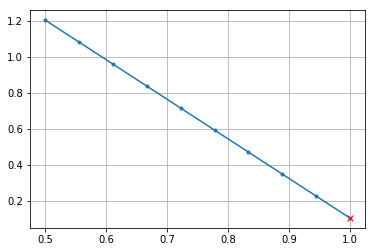

In [113]:
ces = []
ps = np.linspace(0.5, 1, num=10)
for p in ps:
    ces.append(cross_entropy([p, 1-p], [0.9, 0.1]))

plt.plot(ps, ces, '.-')
plt.plot(ps[-1], log_loss_binary_scalar(1, 0.9, eps=1e-15), 'xr')
plt.grid()

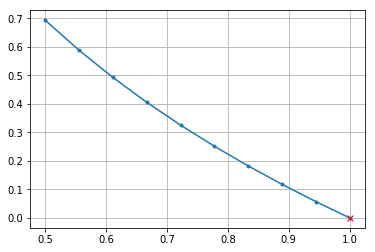

In [114]:
ces = []
eps = 1e-15
ps = np.linspace(0.5, 1 - eps, num=10)
for p in ps:
    ces.append(cross_entropy([1, 0], [p, 1 - p]))

plt.plot(ps, ces, '.-')
plt.plot(ps[-1], log_loss_binary_scalar(1, 1 - eps, eps=1e-15), 'xr')
plt.grid()

### where does perfect, worse, and random baseline land?